In [1]:
import sys
sys.path.append('../centroFlye_repo/scripts')

import numpy as np
from collections import defaultdict, Counter

import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from utils.bio import read_bio_seq
from utils.various import get_kmers

%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]


In [3]:
recruited_kmers_fn = \
"../data/centroFlye_results/recruited_unique_kmers/unique_kmers_min_edge_cov_4.txt"

In [4]:
recruited_kmers = get_kmers(recruited_kmers_fn)

## Frequency of recruited kmers in the assembly

In [5]:
centroFlye_assembly_fn = \
"../data/centroFlye_results/polishing/final_sequence_4.fasta"

In [6]:
centroFlye_assembly = read_bio_seq(centroFlye_assembly_fn)


In [7]:
def get_kmers_freqs(seq, k=19):
    all_kmers = defaultdict(int)
    for i in range(len(seq) - k + 1):
        kmer = seq[i:i+k]
        all_kmers[kmer] += 1
    return all_kmers

In [8]:
kmer_freqs = get_kmers_freqs(centroFlye_assembly)

In [9]:
recruited_kmer_freqs = []
for kmer in recruited_kmers:
    recruited_kmer_freqs.append(kmer_freqs[kmer])

In [10]:
counter = Counter(recruited_kmer_freqs)
counter_mc = counter.most_common()


Frequencies of kmers in assembly:

In [11]:
counter_mc

[(1, 16488),
 (0, 9267),
 (2, 2459),
 (3, 308),
 (4, 93),
 (5, 42),
 (6, 16),
 (7, 9),
 (11, 5),
 (13, 5),
 (10, 4),
 (8, 3),
 (12, 2),
 (15, 1),
 (9, 1)]

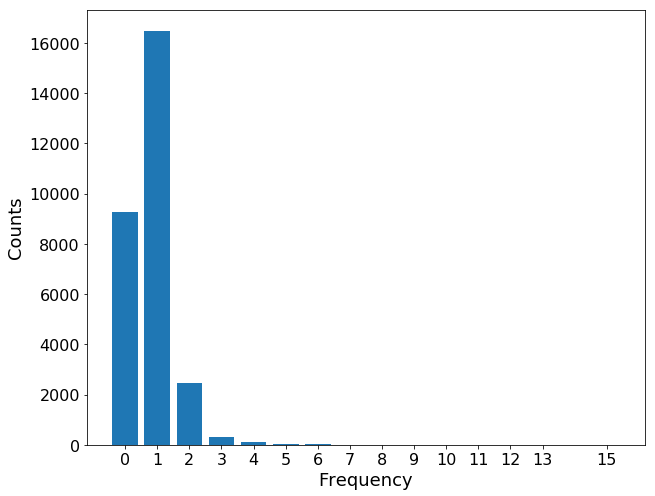

In [12]:
indexes = np.array([x[0] for x in counter_mc])
values = np.array([x[1] for x in counter_mc])
plt.bar(indexes, values)
plt.xticks(np.array(indexes), indexes)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Counts', fontsize=18)
pass

In [13]:
len(recruited_kmers)

28703

Percentage of absent and unique kmers among recruited

In [14]:
counter[0] / len(recruited_kmers), counter[1] / len(recruited_kmers)

(0.32285823781486256, 0.5744347280772045)

In [15]:
(sum(counter.values()) - counter[0] - counter[1]) / len(recruited_kmers), (sum(counter.values()) - counter[0] - counter[1])

(0.10270703410793297, 2948)